In [1]:
## Boston House Dataset

In [2]:
# i want to predict house price, then what kind of ML problem statement is it?
#Regression Problem statement

In [3]:
#life cycle of ML
#1. Data cleaning and wrangling
#2. Define the metrics for which the model is getting optimized
#3. Featrue engineering
#4. Data Pre-Processing
#5. Feature selection
#6. Split the data into training and test datasets
#7. Model Selection
#8. Model validation
#9. Interpret the result

In [4]:
#Importing Dependencies
import requests
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
bos_df=pd.read_csv("BostonHousing.csv")

In [6]:
bos_df.shape

(506, 14)

In [7]:
bos_df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [8]:
df2=bos_df

In [9]:
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:

df2.rename(columns={"medv":'target'},inplace=True)


In [11]:
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
df2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
#observations:
#crime, indus and Rad have mean grater than median so it's right skewed
# large gap between 75th percentile and max val then crim,zn ,indus have outlaiers

<Axes: >

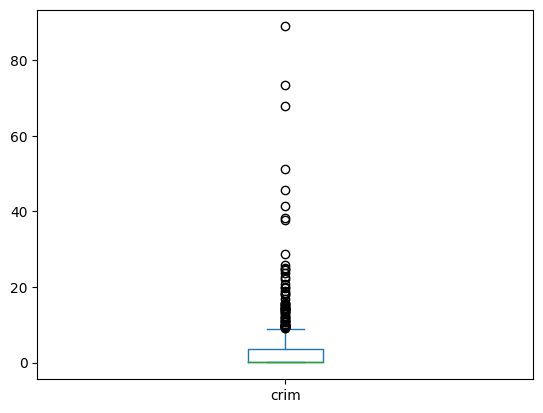

In [17]:
df2['crim'].plot.box()

<Axes: >

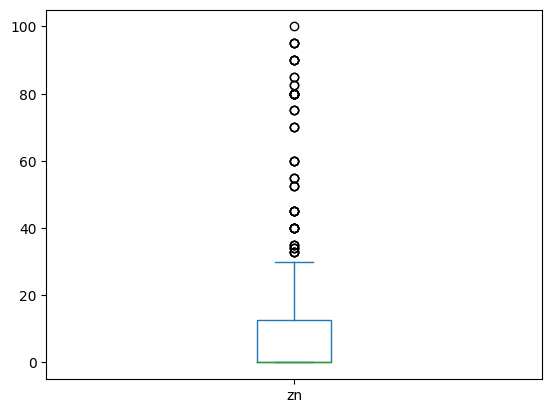

In [18]:
df2['zn'].plot.box()

crim          Axes(0.125,0.53;0.0945122x0.35)
zn         Axes(0.238415,0.53;0.0945122x0.35)
indus      Axes(0.351829,0.53;0.0945122x0.35)
chas       Axes(0.465244,0.53;0.0945122x0.35)
nox        Axes(0.578659,0.53;0.0945122x0.35)
rm         Axes(0.692073,0.53;0.0945122x0.35)
age        Axes(0.805488,0.53;0.0945122x0.35)
dis           Axes(0.125,0.11;0.0945122x0.35)
rad        Axes(0.238415,0.11;0.0945122x0.35)
tax        Axes(0.351829,0.11;0.0945122x0.35)
ptratio    Axes(0.465244,0.11;0.0945122x0.35)
b          Axes(0.578659,0.11;0.0945122x0.35)
lstat      Axes(0.692073,0.11;0.0945122x0.35)
target     Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

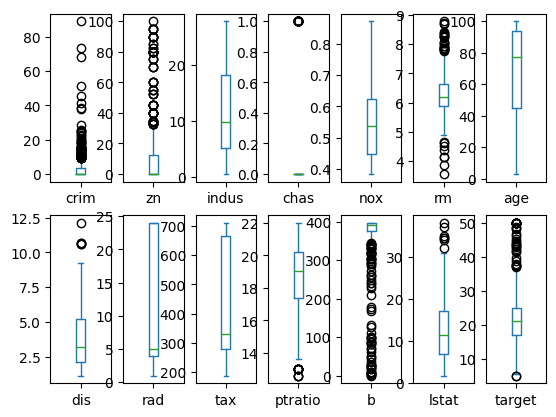

In [19]:
df2.plot(kind='box',subplots=True,layout=(2,7))

In [20]:
# Treat outlaiers
from scipy.stats import zscore

In [21]:
z=np.abs(zscore(df2))

In [30]:
z

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562,0.159686
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439,0.101524
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727,1.324247
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517,1.182758
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147,0.014454
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850,0.210362
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048,0.148802
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302,0.057989


In [31]:
th=3
print(np.where(z>th))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

<Axes: ylabel='Frequency'>

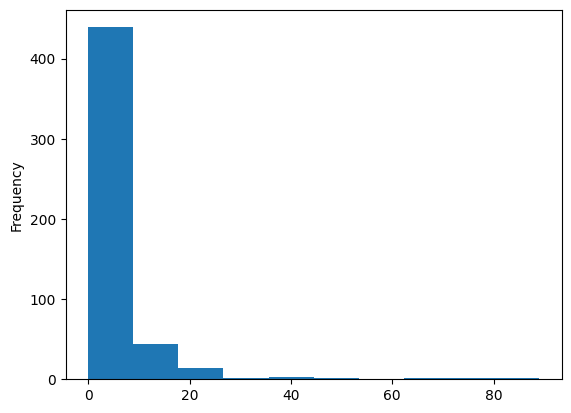

In [35]:
df2['crim'].plot.hist()

In [36]:
from scipy.stats import boxcox

In [37]:
#i can normalize the data in multiple ways or rdeduce the effect of outliers on the data
#df['crim']=np.log(df['crim'])
#np.log(df2['crim'].plot.hist())

In [38]:
df2['crim']=boxcox(df2['crim'],0)

<Axes: ylabel='Frequency'>

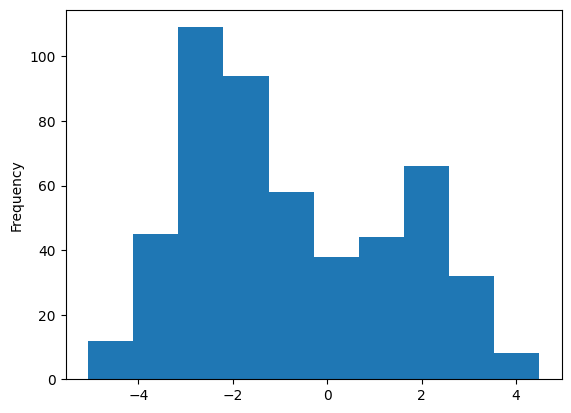

In [39]:
df2['crim'].plot.hist()

In [41]:
## Bivariate Analysis

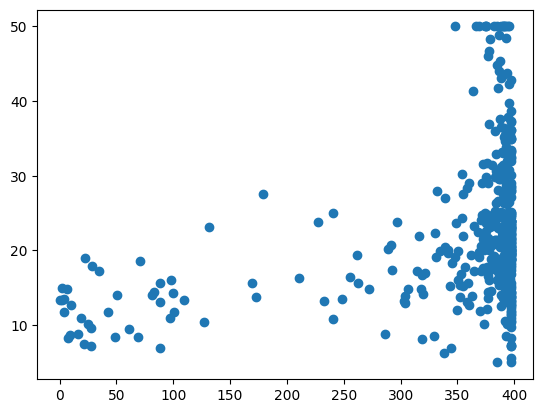

In [43]:
plt.scatter(df2['b'],df2['target'])

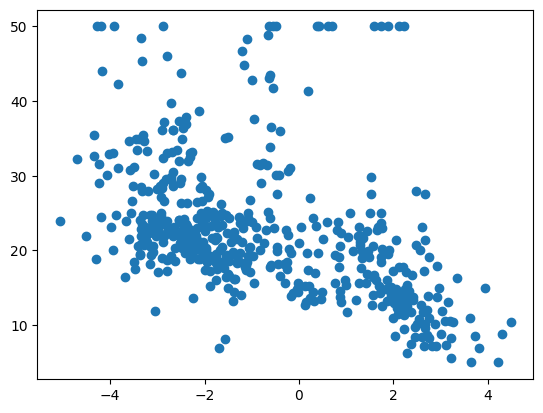

In [45]:
plt.scatter(df2['crim'],df2['target'])

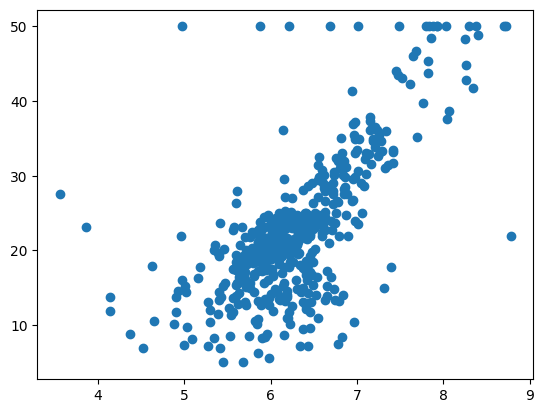

In [46]:
x=df2['rm']
y=df2['target']
plt.scatter(x,y)
plt.show()

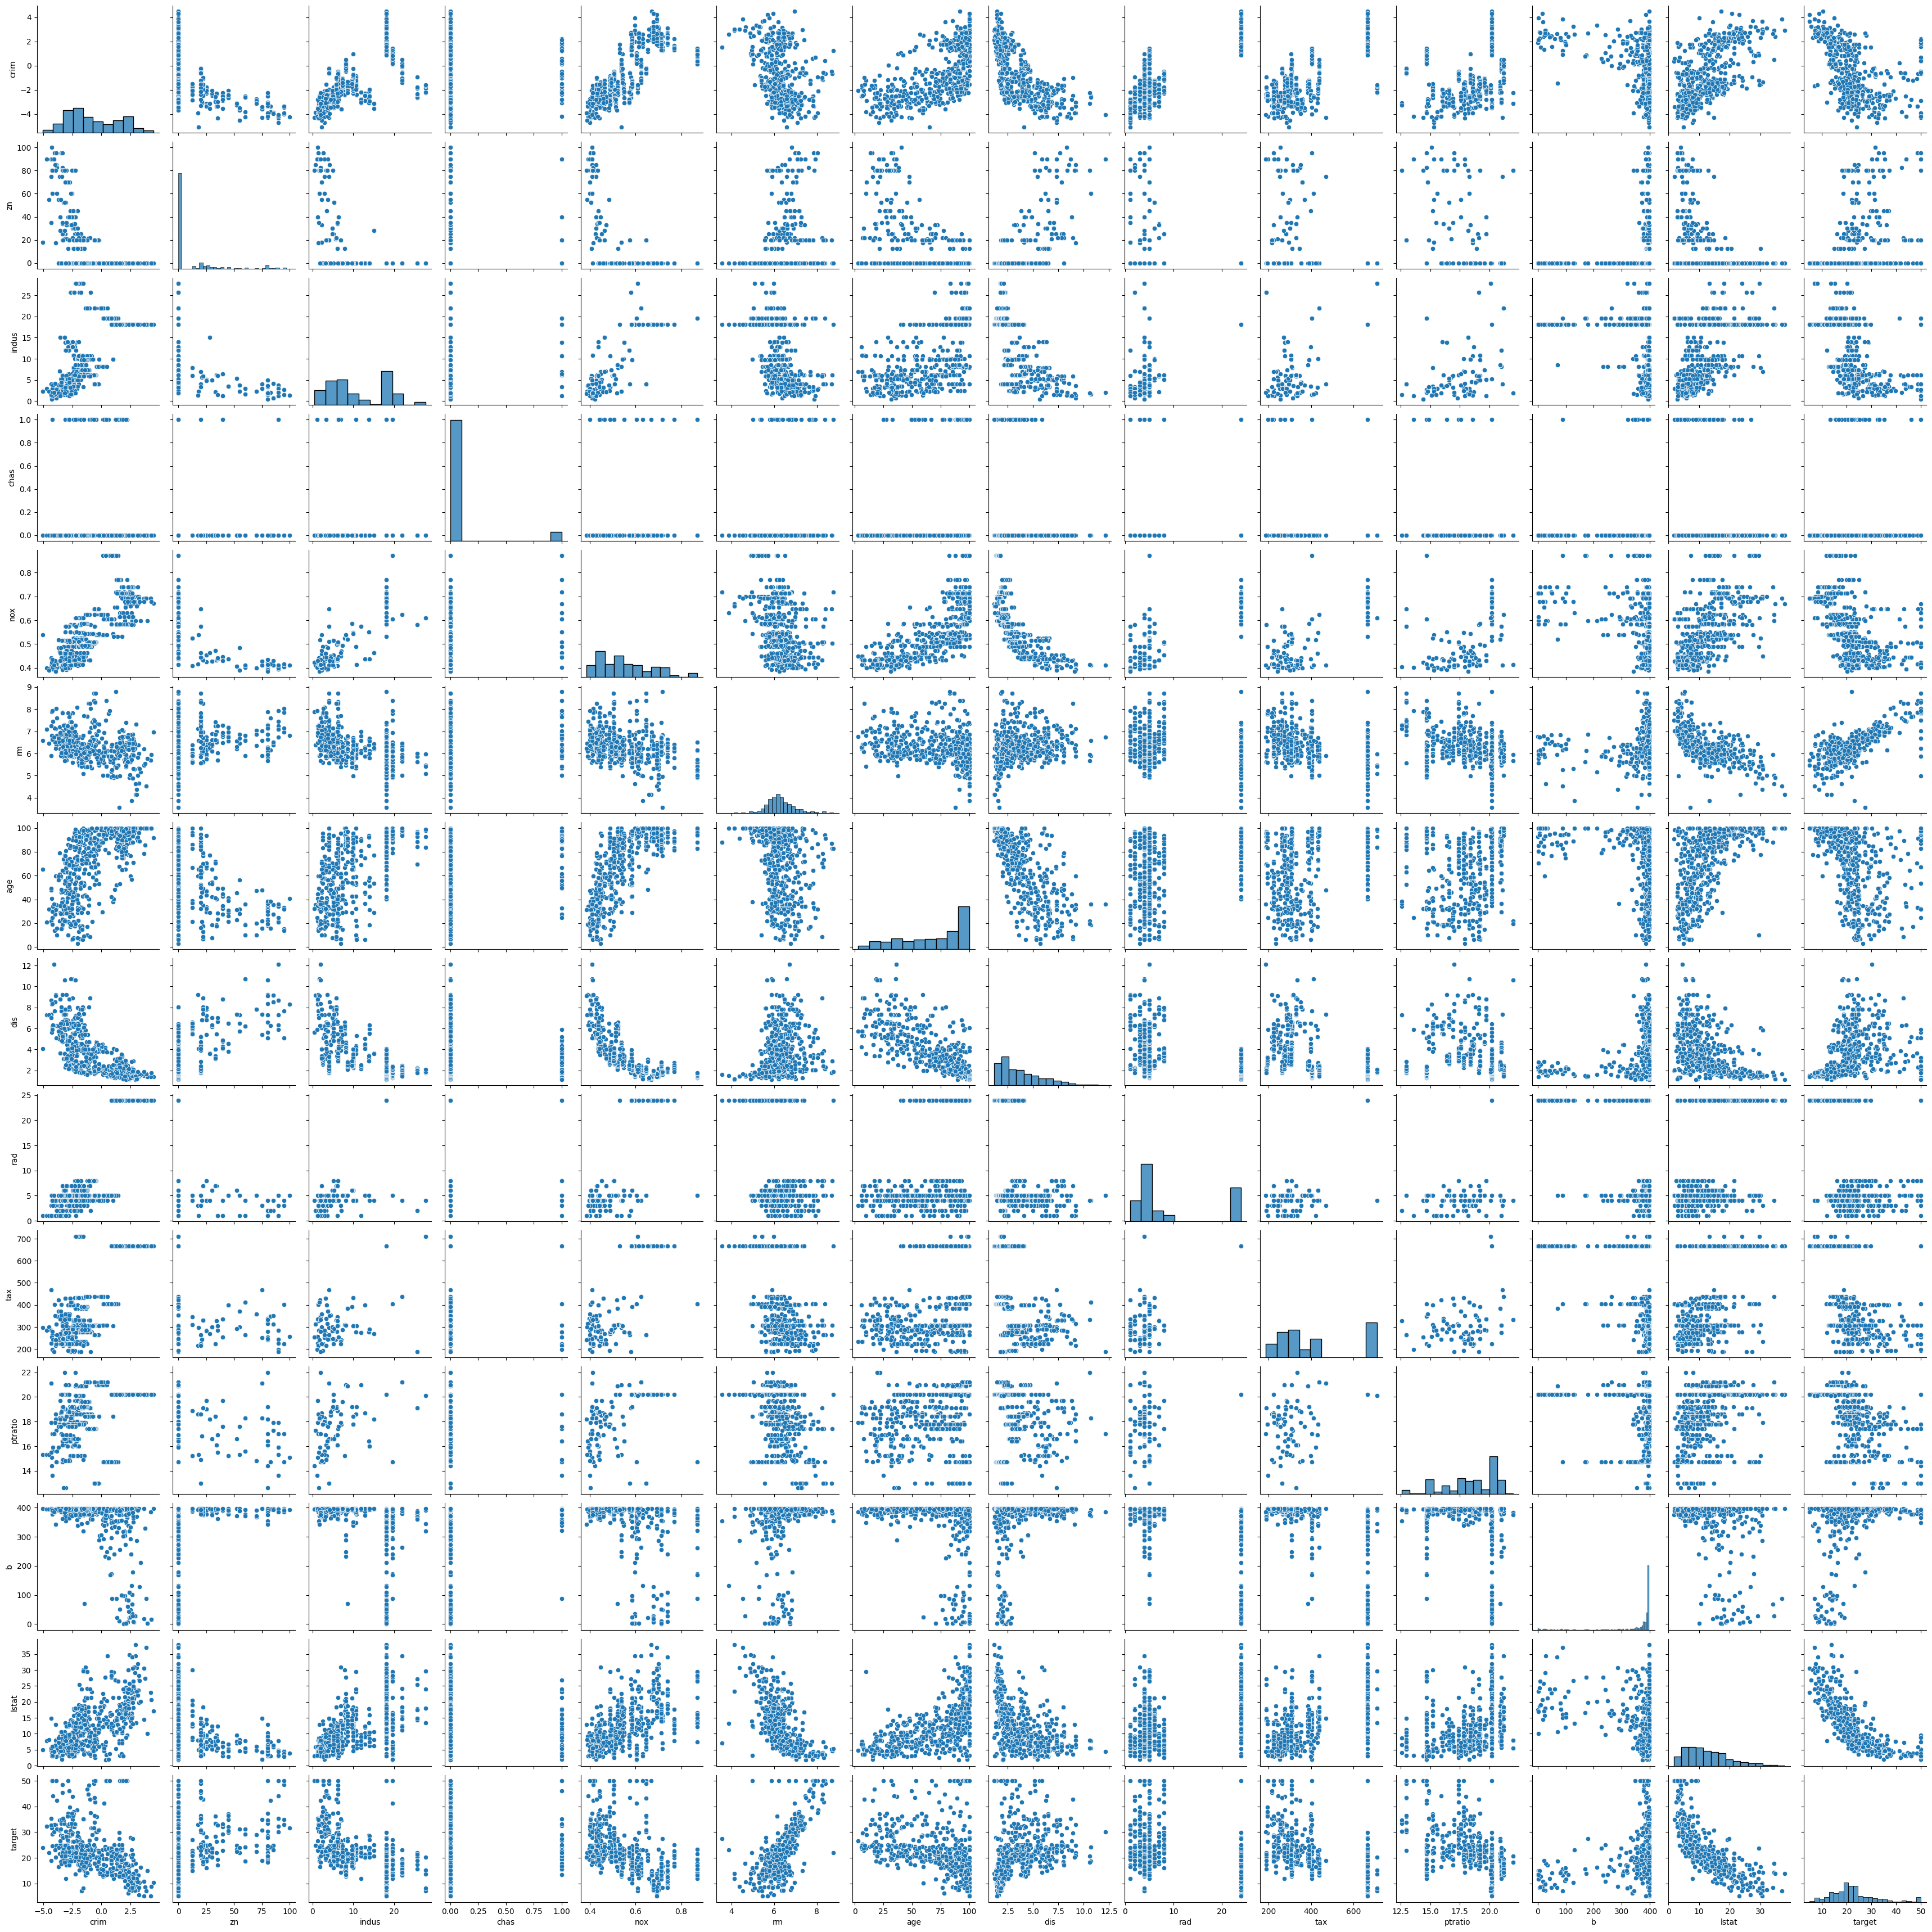

In [47]:
sns.pairplot(df2)

In [48]:
df2.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
target     0
dtype: int64

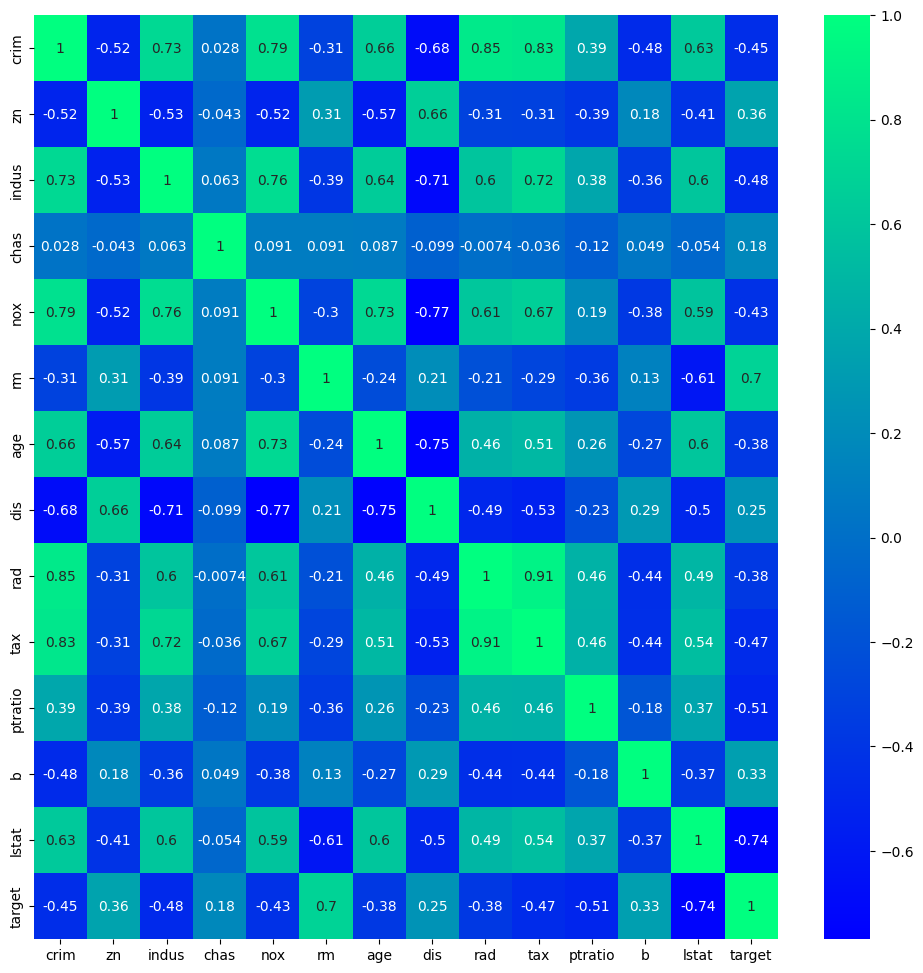

In [53]:
corr_map=df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_map,annot=True,cmap='winter')
plt.show()


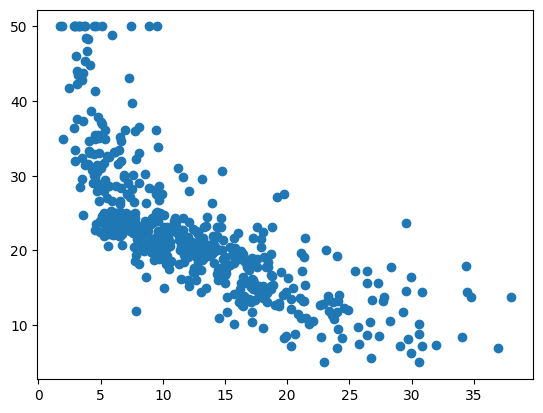

In [55]:
plt.scatter(df2['lstat'],df2['target'])
plt.show()

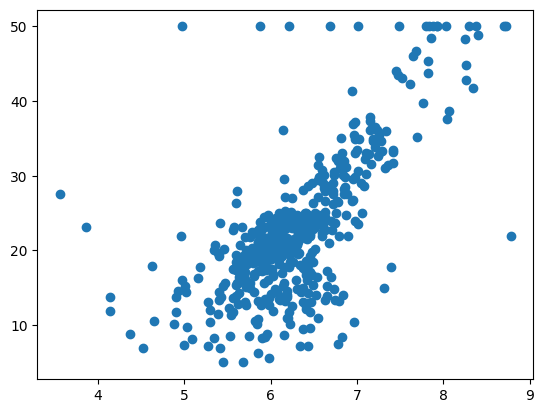

In [57]:
plt.scatter(df2['rm'],df2['target'])
plt.show()

In [59]:
df2.drop('lstat',axis=1,inplace=True)

In [61]:
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,target
0,-5.064036,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2


In [64]:
df3=df2[(z<3).all(axis=1)]

In [66]:
df3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,target
0,-5.064036,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2


In [67]:
x=df3.iloc[:,0:-1]
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b
0,-5.064036,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
1,-3.600502,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
2,-3.601235,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83
3,-3.430523,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
4,-2.672924,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90


In [68]:
y=df3.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [71]:
#Standardization of data
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [75]:
sd_model=scaler.fit(x_train)
x_train=sd_model=scaler.transform(x_train)

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [79]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
lr.coef_

array([ 4.08517481e-01,  1.51699121e-01, -2.27620361e-01,  3.88578059e-16,
       -1.86382827e+00,  4.44617151e+00, -1.58116494e+00, -2.59501807e+00,
        1.32856450e+00, -2.10560222e+00, -2.14949504e+00,  4.00620661e-01])

In [81]:
lr.intercept_

22.514457831325295

In [82]:
x_test=sd_model=scaler.transform(x_test)

In [83]:
pred=lr.predict(x_test)

In [84]:
r2_score(pred,y_test)

0.7264291883293276

In [85]:
mean_absolute_error(pred,y_test)

2.8220961913660796